<a href="https://colab.research.google.com/github/DayeonKim517/boostcourse_Data_Science_Projects-2024/blob/main/Week4_mission_LUKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

In [ ]:
print(df.shape)

(2772, 5)


In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [ ]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [ ]:
df["판매유형별"].value_counts()

,count
판매유형별,
면세점 이외,2772


#📌 Q1
시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

* 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
* describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다.   아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
* 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
* 데이터는 위에서 제공된 데이터를 사용합니다.
* 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [ ]:
# 컬럼명 변경
df = df.rename(columns={'데이터': '백만'})

df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [ ]:
# 수치 데이터로 표현하기 위해 데이터 타입 변경
df["시점"] = df["시점"].map(lambda x : x.replace(".", " ").replace("/", " "))
df["연도"] = df["시점"].map(lambda x : int(x.split()[0]))
df["분기"] = df["시점"].map(lambda x : int(x.split()[1]))

df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017 1 4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017 2 4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017 3 4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017 4 4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018 1 4,2033,2018,1


In [ ]:
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


# **기술 통계로 알 수 있는 점**

- 분포 형태: 최솟값과 최댓값을 통해 데이터의 범위를 확인할 수 있음


- 데이터의 일관성: 모든 컬럼에서 count가 동일하게 2772로 나타나 데이터가 누락 없이 잘 정리되어 있음을 확인할 수 있음.


# 📌 Q2
pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

* 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
* pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


In [ ]:
# 국가(대륙)별 연도별 판매액의 합계 pivot table
pivot = pd.pivot_table(df,
                      index = '국가(대륙)별',
                      columns = '연도',
                      values = '백만',
                      aggfunc = 'sum')
pivot

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


<Figure size 1200x600 with 0 Axes>

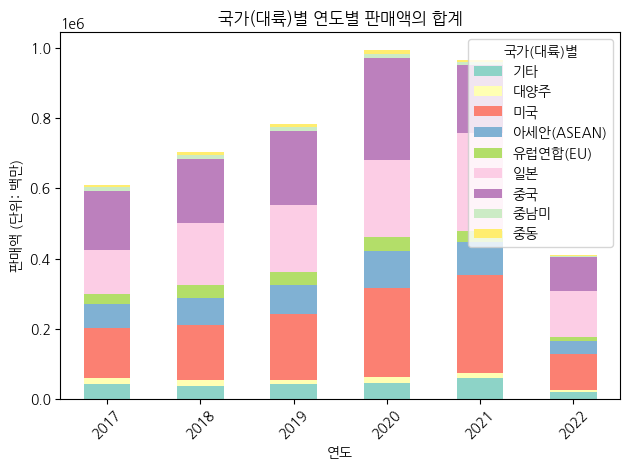

In [ ]:
# 막대 그래프를 이용하여 시각화
plt.figure(figsize=(12, 6))
pivot.T.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('국가(대륙)별 연도별 판매액의 합계')
plt.xlabel('연도')
plt.ylabel('판매액 (단위: 백만)')
plt.xticks(rotation=45)
plt.legend(title='국가(대륙)별')
plt.tight_layout()

# 그래프 출력
plt.show()

<Axes: title={'center': '국가(대륙)별 연도별 판매액의 합계'}, xlabel='연도', ylabel='국가(대륙)별'>

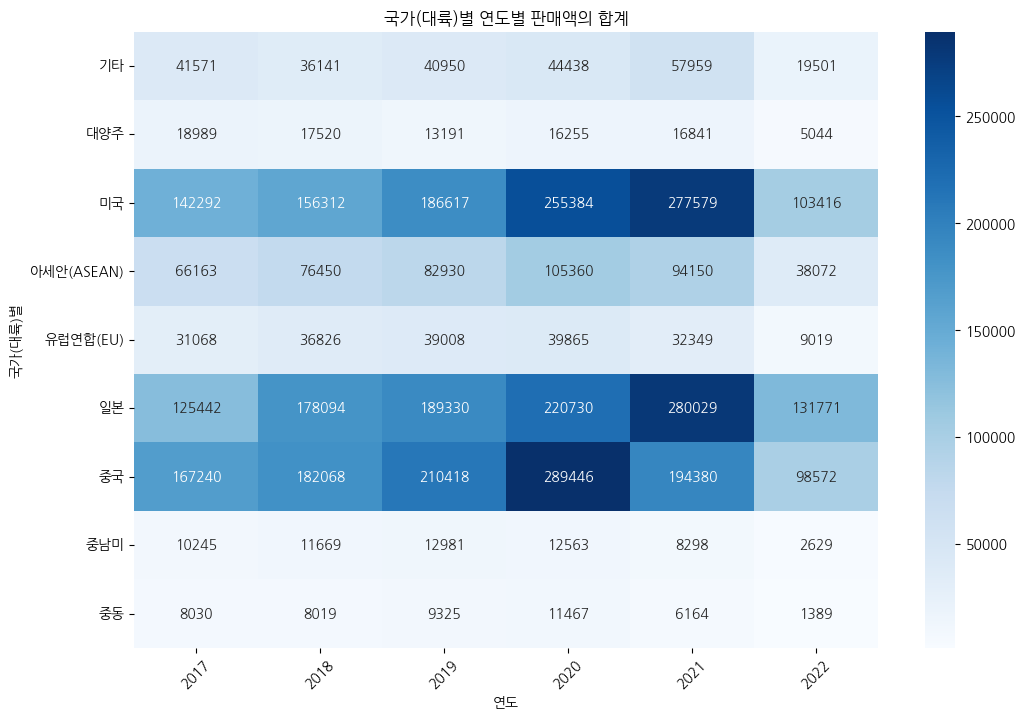

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("국가(대륙)별 연도별 판매액의 합계")
plt.xticks(rotation=45)
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

# 📌 Q3
groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

* 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다.  
또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다.  
이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요!  
또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


In [ ]:
df_2020 = df[df['연도'] == 2020]

In [ ]:
# 2020년의 온라인 해외판매 상품군 지역별 합계
total_ordering = df_2020.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack()
total_ordering

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


<Figure size 1200x800 with 0 Axes>

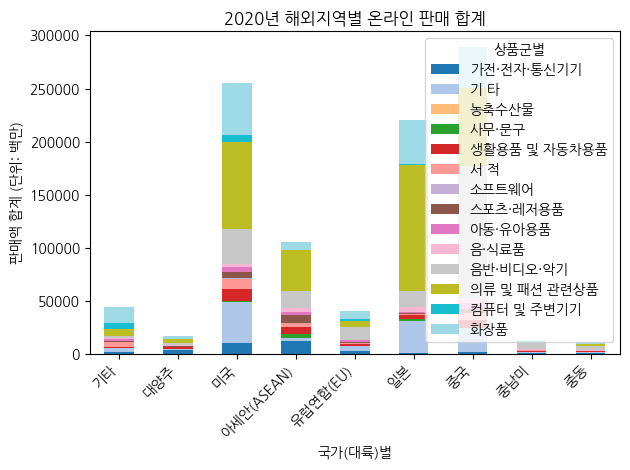

In [ ]:
# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
total_ordering.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('2020년 해외지역별 온라인 판매 합계')
plt.xlabel('국가(대륙)별')
plt.ylabel('판매액 합계 (단위: 백만)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 그래프 출력
plt.show()

<ipython-input-44-ff349bc32e53>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_2020, x="상품군별", y="백만", hue="국가(대륙)별", ci=None)


<Axes: title={'center': '2020년 상품군별 국가별 판매액의 합계'}, xlabel='상품군별', ylabel='백만'>

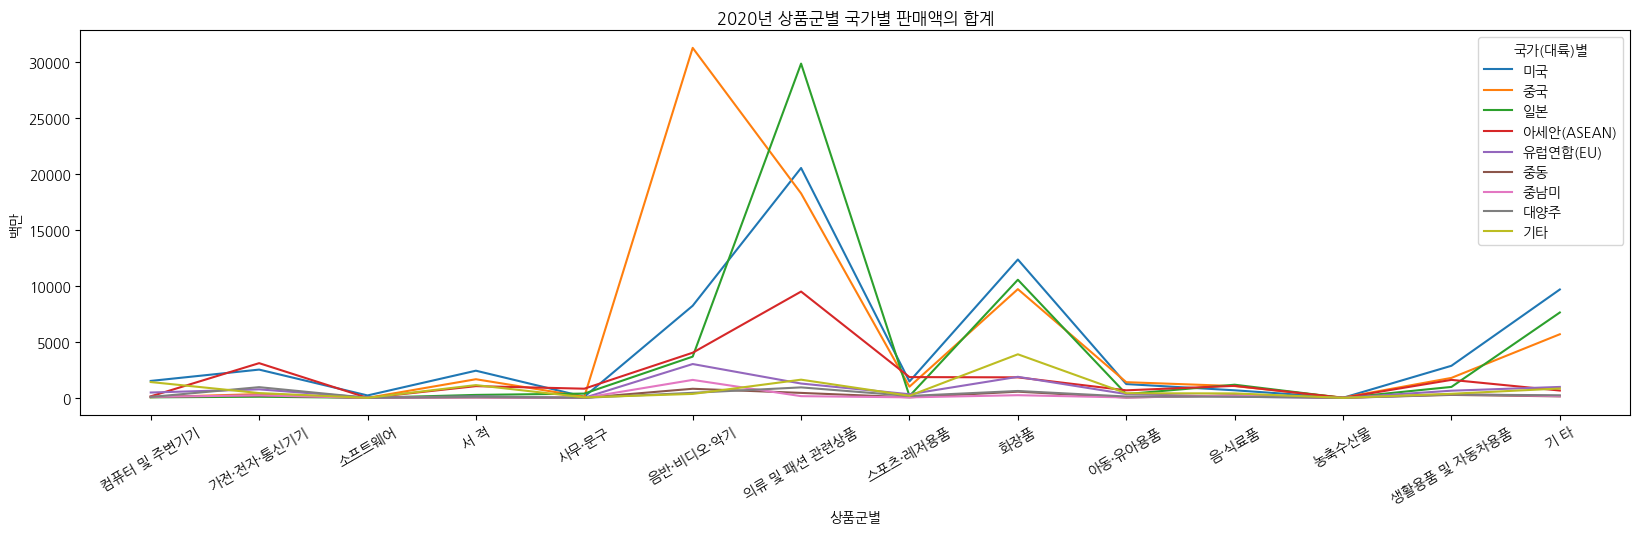

In [ ]:
# lineplot으로 시각화
plt.figure(figsize=(20, 5))
plt.title("2020년 상품군별 국가별 판매액의 합계")
plt.xticks(rotation=30)
sns.lineplot(data=df_2020, x="상품군별", y="백만", hue="국가(대륙)별", ci=None)

# 분석 결과

- 미국: 다양한 상품군에서 매우 높은 판매액을 기록. 특히 "의류 및 패션 관련상품"과 "음반·비디오·악기"에서 두드러진 성과를 보임

- 아세안(ASEAN): 주로 "스포츠·레저용품"과 "음반·비디오·악기"에서 큰 비중을 차지함. 온라인 판매가 매우 활발.

- 중국: "음반·비디오·악기"와 "의류 및 패션 관련상품"에서 높은 판매액을 기록.화장품 분야에서도 상당한 판매가 이루어졌음.

- 일본: "의류 및 패션 관련상품"과 "화장품" 분야에서 특히 높은 판매액을 기록했으며, 서적과 음반도 중요한 비중을 차지함

- 기타 지역: 기타 지역 역시 다양한 상품군에서 판매가 이루어졌지만, 특정 상품군에 집중된 판매는 비교적 적었음

# 인사이트

- 특정 상품군의 인기: 의류, 화장품, 음반 등 특정 상품군이 전 세계적으로 큰 인기를 끌었으며, 이는 해당 상품군의 글로벌 수요가 높다는 것을 나타냄.

- 지역별 선호도: 각 지역별로 선호하는 상품군이 다르다는 것을 알 수 있으며, 이는 해당 지역의 문화적 차이와 소비 패턴을 반영한 결과로 해석될 수 있음.

# 📌 Q4.
주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

* 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다.  
2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!  
* 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.


In [ ]:
 # 판매액이 높은 세 국가와 주요 판매 상품군
country = ["미국", "중국", "일본"]
goods = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]

df_filter = df[df['연도'] <= 2021]
df_filter = df_filter[df_filter['국가(대륙)별'].isin(country)]
df_filter = df_filter[df_filter['상품군별'].isin(goods)]

df_filter.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017 1 4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017 2 4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017 3 4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017 4 4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018 1 4,2362,2018,1


In [ ]:
df_USA = df_filter[df_filter['국가(대륙)별'] == "미국"]
df_China = df_filter[df_filter['국가(대륙)별'] == "중국"]
df_Japan = df_filter[df_filter['국가(대륙)별'] == "일본"]

# 각 지역별 제품별 판매액
pivot_USA = pd.pivot_table(df_USA,
                      index = '연도',
                      columns = '상품군별',
                      values = '백만',
                      aggfunc = 'sum')

pivot_China = pd.pivot_table(df_China,
                      index = '연도',
                      columns = '상품군별',
                      values = '백만',
                      aggfunc = 'sum')

pivot_Japan = pd.pivot_table(df_Japan,
                      index = '연도',
                      columns = '상품군별',
                      values = '백만',
                      aggfunc = 'sum')

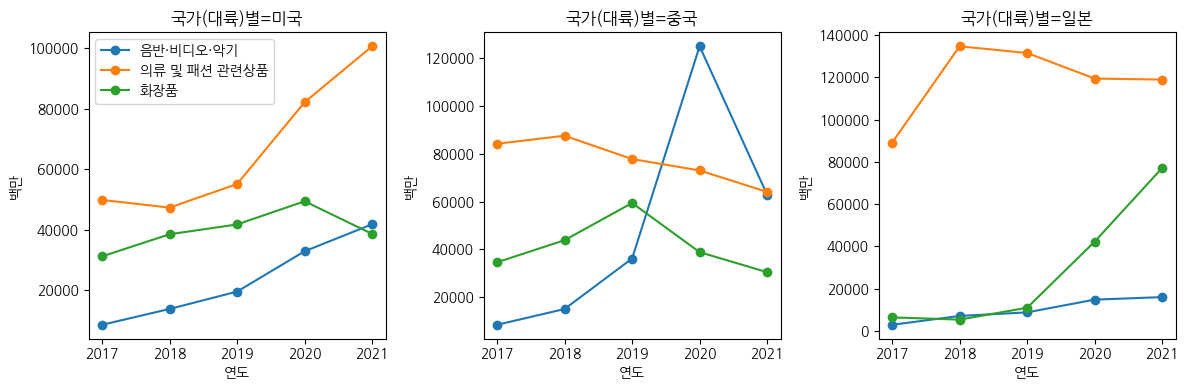

In [ ]:
# subplot으로 시각화
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].plot(pivot_USA, marker='o')
axs[0].set_title('국가(대륙)별=미국')
axs[0].set_xlabel('연도')
axs[0].set_ylabel('백만')
axs[0].legend(["음반·비디오·악기", "의류 및 패션 관련상품", "화장품"])

axs[1].plot(pivot_China, marker='o')
axs[1].set_title('국가(대륙)별=중국')
axs[1].set_xlabel('연도')
axs[1].set_ylabel('백만')

axs[2].plot(pivot_Japan, marker='o')
axs[2].set_title('국가(대륙)별=일본')
axs[2].set_xlabel('연도')
axs[2].set_ylabel('백만')

plt.tight_layout()
plt.show()

# 📌 Q5
KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

* 지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
* KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
* 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
* 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.


지역별_신·재생에너지_생산량.csv 분석

---

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/데이터분석/네이버 부스트코스/4주차/4주차_data/지역별_신·재생에너지_생산량.csv", encoding="cp949")
df.head()

,에너지원별(1),에너지원별(2),에너지원별(3),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,...,2022.8,2022.9,2022.10,2022.11,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17
0,에너지원별(1),에너지원별(2),에너지원별(3),전국,서울,부산,대구,인천,광주,대전,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,신·재생에너지 합계①+② (toe),소계,소계,15706206,317023,236408,179814,586824,128439,114634,...,90157,1782795,1730425,851656,2163189,2539588,1754851,1288507,782019,679417
2,신·재생에너지 합계①+② (toe),① 재생에너지 합,소계,14134169,245539,166498,176575,299790,114533,96207,...,81552,1453494,1671606,807715,1640544,2515875,1692575,1282200,775878,679329
3,신·재생에너지 합계①+② (toe),② 신에너지 합,소계,1572037,71483,69911,3238,287034,13906,18427,...,8605,329301,58819,43942,522644,23713,62277,6308,6142,88
4,신·재생에너지 지역별 공급비중 (%),소계,소계,100.00,2.02,1.51,1.14,3.74,0.82,0.73,...,0.57,11.35,11.02,5.42,13.77,16.17,11.17,8.20,4.98,4.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   에너지원별(1)  42 non-null     object
 1   에너지원별(2)  42 non-null     object
 2   에너지원별(3)  42 non-null     object
 3   2022      42 non-null     object
 4   2022.1    42 non-null     object
 5   2022.2    42 non-null     object
 6   2022.3    42 non-null     object
 7   2022.4    42 non-null     object
 8   2022.5    42 non-null     object
 9   2022.6    42 non-null     object
 10  2022.7    42 non-null     object
 11  2022.8    42 non-null     object
 12  2022.9    42 non-null     object
 13  2022.10   42 non-null     object
 14  2022.11   42 non-null     object
 15  2022.12   42 non-null     object
 16  2022.13   42 non-null     object
 17  2022.14   42 non-null     object
 18  2022.15   42 non-null     object
 19  2022.16   42 non-null     object
 20  2022.17   42 non-null     object
dtypes: object(21)
memo

In [ ]:
# '에너지원별(2)'이 '태양광 (toe)'인 행들만 필터링
df_solar = df[df['에너지원별(2)'] == '태양광 (toe)']

# 필요한 데이터만 선택하고 '에너지원별(1)' 컬럼을 인덱스로 설정
df_solar = df_solar.drop(columns=['에너지원별(1)', '에너지원별(2)', '에너지원별(3)'])

# 데이터 타입 변환 (모든 열을 숫자로 변환)
df_solar = df_solar.apply(pd.to_numeric, errors='coerce')
df_solar.head()

,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17
6,6609387,65697,71015,55601,57128,84614,30136,38903,24538,464713,468677,369737,792320,1183907,1364272,875924,492688,169517
7,5683463,11102,43416,32857,26773,64017,11176,23094,15598,317901,411415,296031,712666,1110016,1276247,795013,391363,144777
8,925924,54595,27599,22744,30354,20598,18960,15809,8940,146812,57262,73706,79653,73890,88024,80912,101325,24740


In [ ]:
# 데이터의 연도별로 합계를 구하고 연도를 인덱스로 설정
df_solar.index = ['2020', '2021', '2022']
df_solar = df_solar.transpose()
df_solar

,2020,2021,2022
2022,6609387,5683463,925924
2022.1,65697,11102,54595
2022.2,71015,43416,27599
2022.3,55601,32857,22744
2022.4,57128,26773,30354
2022.5,84614,64017,20598
2022.6,30136,11176,18960
2022.7,38903,23094,15809
2022.8,24538,15598,8940
2022.9,464713,317901,146812


<Figure size 1200x800 with 0 Axes>

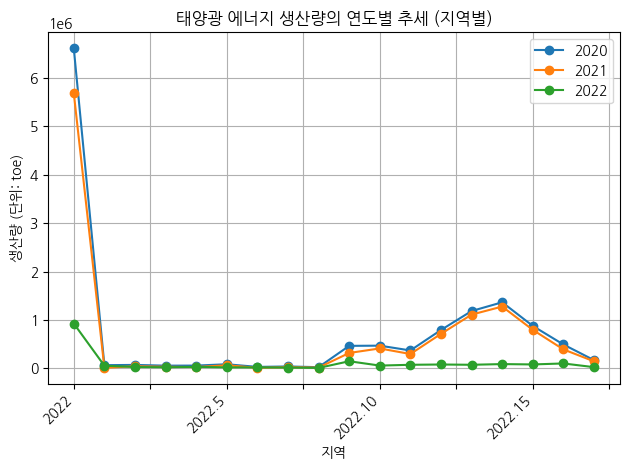

In [ ]:
# 시각화
plt.figure(figsize=(12, 8))
df_solar.plot(kind='line', marker='o')
plt.title('태양광 에너지 생산량의 연도별 추세 (지역별)')
plt.xlabel('지역')
plt.ylabel('생산량 (단위: toe)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 그래프 출력
plt.show()